# Perceptron algorithm

In [1]:
# define required libraries
import numpy as np
import pandas as pd
import random
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read test data
data = pd.read_csv('data.csv')
data.head()

,x1,x2,y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [3]:
# create numpy arrays
X = data[['x1', 'x2']].to_numpy()
y = data.y.to_numpy()

In [4]:
def step_function(x):
    """
    Step function definition.
    """
    if x >= 0:
        y = 1
    else:
        y = 0
    return y

In [5]:
def predict_perceptron(X, W, b):
    """
    Predict perceptron algorithm based on input X, weights W and bias b.
    """
    y_hat = X[:, 1].copy()
    for i in range(len(y)):
        
        # make linear combination and apply step function
        y_hat[i] = step_function(float(np.matmul(W, X[i]) + b))
    
    return y_hat

In [6]:
def learning_step(X, y, W, b, learning_rate):
    """
    Update weights W and bias b.
    """
    y_hat = predict_perceptron(X, W, b)
    
    for i in range(len(y_hat)):
        
        # if the point is classified positive, but it has a negative label, subtract
        if y[i] - y_hat[i] == -1:
            W -= X[i] * learning_rate
            b -= b * learning_rate
        
        # if the point is classified negative, but it has a positive label, add
        if y[i] - y_hat[i] == 1:
            W += X[i] * learning_rate
            b += b * learning_rate
    
    return W, b

In [7]:
def fit_perceptron(X, y, learning_rate=0.01, num_epochs=10, set_seed=4):
    """
    Fit perceptron algorithm.
    
    Args:
    - X (numpy arry): Features.
    - y (numpy array): Labels.
    - learning_rate (float): Learning rate.
    - num_epochs (int): Number of iterations.
    - set_seed (int): Seed for initialization.
    
    Returns:
    - W (numpy array): Achieved weights (model result).
    - b (float): Achieved bias (model result).
    """
    # set seet to reproduce results
    random.seed(set_seed)
    
    # determine dimensions
    ncol = X.shape[1]
    
    # initialize weights
    W = np.array([random.random() for i in range(ncol)])
    
    # initialize bias
    b = random.random()
    
    # update weights
    for i in range(num_epochs):
        if (i + 1) % 10 == 0:
            print('epoch: {}/{}'.format(i + 1, num_epochs))
        W, b = learning_step(X, y, W, b, learning_rate)
    
    return W, b

## Fit perceptron model

In [8]:
W, b = fit_perceptron(X, y, learning_rate=0.01, num_epochs=50)

epoch: 10/50
epoch: 20/50
epoch: 30/50
epoch: 40/50
epoch: 50/50


In [9]:
y_hat = predict_perceptron(X, W, b)
print('final accuracy score: {} %'.format(accuracy_score(y, y_hat) * 100))

final accuracy score: 94.0 %


## Plot model line

In [10]:
def plot_line(W, b, x):
    y = x.copy()
    for i in range(len(x)):
        y[i] = (- b - W[1] * x[i]) / W[0]
    
    return y

In [11]:
# define x1 and x2
x1 = np.arange(0, 1, 0.1)
x2 = plot_line(W, b, x1)

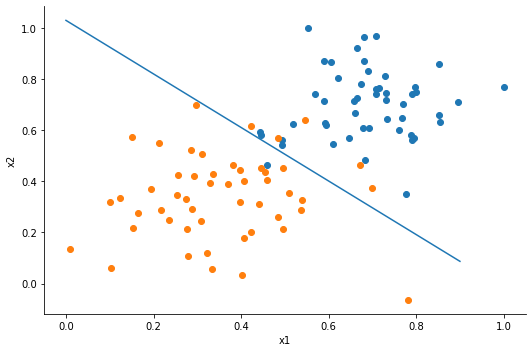

In [12]:
fg = sns.FacetGrid(data=data, hue='y', height=5, aspect=1.5)
fg.map(plt.scatter, 'x1', 'x2')
fg.axes[0, 0].plot(x1, x2)
plt.show()